In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from skimage.io import imsave, imread,imshow

from noise import add_salt_and_pepper, add_gauss_noise

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]


Image shape (640, 640, 3)


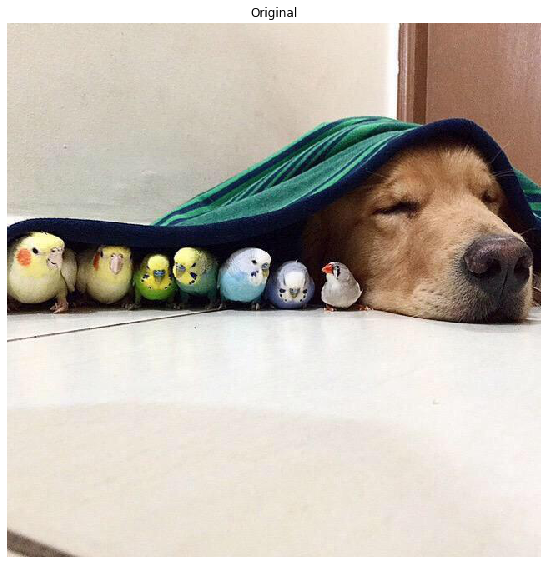

In [2]:
img = imread('image.jpg')
print("Image shape",img.shape)

imshow(img)
plt.axis('off'), plt.title('Original')
plt.show()

# Spatial filtering

Spatial filtering consists of a convolution operation between an image and a filter/subimage/window/kernel. The convolution replaces every pixel in the image with a value computed from the neighbours of the pixel.The pattern of neighbours is called the "window", which slides, pixel by pixel over the entire image. The simplest filter is the mean-filter also known as the box-filter, which replaces a pixel with the average of its neighbours. This is equivalent to giving an equal weight to all pixels around the center regardless of the distance from the center pixel.

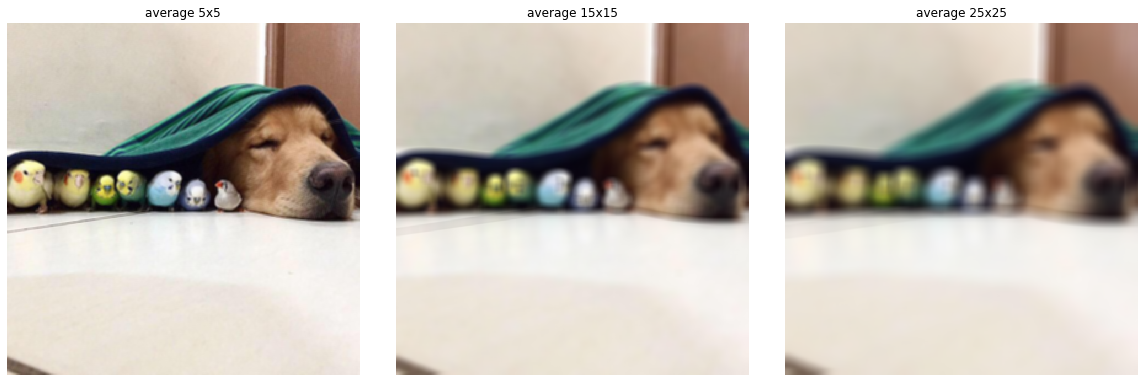

In [3]:
blur5 = cv2.blur(img,(5,5))
blur15 = cv2.blur(img,(15,15))
blur25 = cv2.blur(img,(25,25))

plt.subplot(131), imshow(blur5), plt.title('average 5x5'), plt.axis('off')
plt.subplot(132), imshow(blur15), plt.title('average 15x15'), plt.axis('off')
plt.subplot(133), imshow(blur25), plt.title('average 25x25'), plt.axis('off')
plt.show()

Mathematically, applying a Gaussian blur to an image is the same as convolving the image with a Gaussian function. Gaussian filters weigh pixels a bell-curve around the center pixel. This means that farther pixels get lower weights.

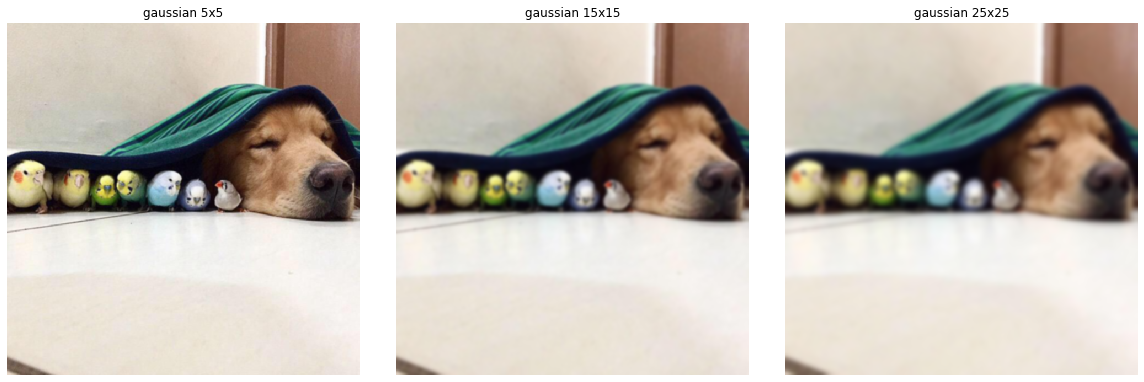

In [4]:
blur5 = cv2.GaussianBlur(img,(5,5),0)
blur15 = cv2.GaussianBlur(img,(15,15),0)
blur25 = cv2.GaussianBlur(img,(25,25),0)

plt.subplot(131), imshow(blur5), plt.title('gaussian 5x5'), plt.axis('off')
plt.subplot(132), imshow(blur15), plt.title('gaussian 15x15'), plt.axis('off')
plt.subplot(133), imshow(blur25), plt.title('gaussian 25x25'), plt.axis('off')
plt.show()

Median filtering is a nonlinear method used to remove noise from images. It is widely used as it is very effective at removing noise while preserving edges. It is particularly effective at removing ‘salt and pepper’ type noise. The median filter works by moving through the image pixel by pixel, replacing each value with the median value of neighbouring pixels.  The median is calculated by first sorting all the pixel values from the window into numerical order, and then replacing the pixel being considered with the middle (median) pixel value. You can use np.median function, if you like!

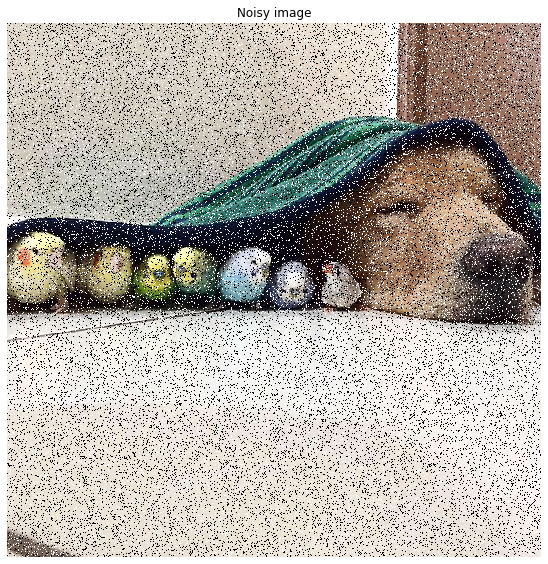

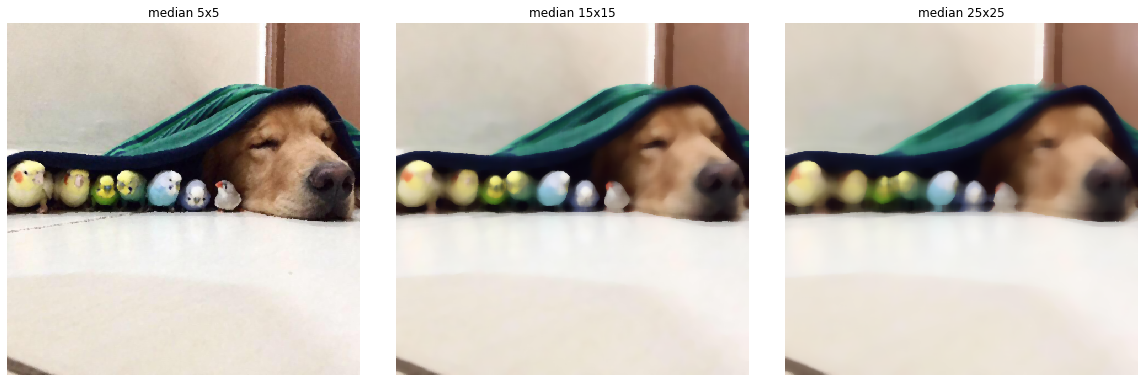

In [5]:
noisy = add_salt_and_pepper(img,0.1)
imshow(noisy)
plt.axis('off'), plt.title('Noisy image')  # Turn of axis numbers and ticks
plt.show()

median5 = cv2.medianBlur(noisy,5)
median15 = cv2.medianBlur(noisy,15)
median25 = cv2.medianBlur(noisy,25)

plt.subplot(131), imshow(median5), plt.title('median 5x5'), plt.axis('off')
plt.subplot(132), imshow(median15), plt.title('median 15x15'), plt.axis('off')
plt.subplot(133), imshow(median25), plt.title('median 25x25'), plt.axis('off')
plt.show()

The bilateral filter is a non-linear, spatially varying filter that better preserves edges than the Gaussian filter. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.

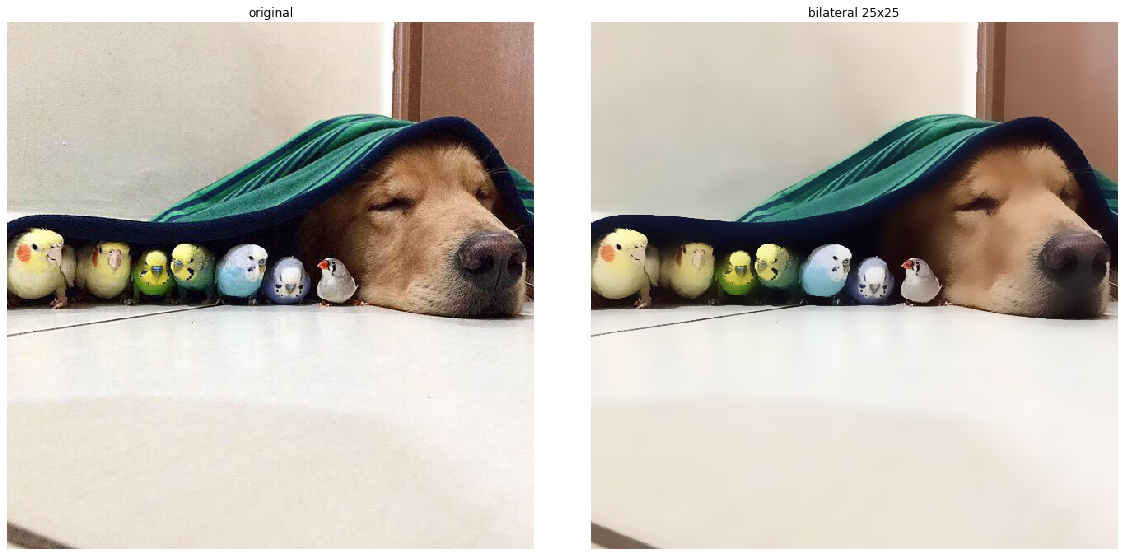

In [6]:
blur = cv2.bilateralFilter(img,25,75,75)
plt.subplot(121), imshow(img), plt.title('original'), plt.axis('off')
plt.subplot(122), imshow(blur), plt.title('bilateral 25x25'), plt.axis('off')
plt.show()


# Edge detection

A directional filter (such as the Sobel filter) is an edge detector that can be used to compute the first derivatives of an image. The first derivatives (or slopes) are most evident when a large change occurs between adjacent pixel values.Directional filters can be designed for any direction within a given space.


A Laplacian filter is an edge detector used to compute the second derivatives of an image, measuring the rate at which the first derivatives change. This determines if a change in adjacent pixel values is from an edge or continuous progression. Laplacian filter kernels usually contain negative values in a cross pattern, centered within the array. The corners are either zero or positive values. The center value can be either negative or positive.

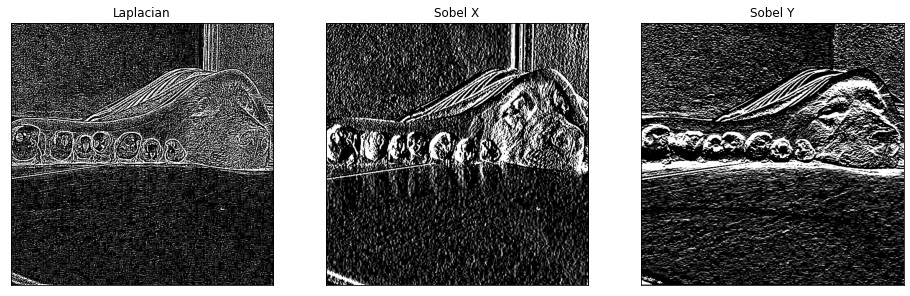

In [7]:
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplacian = cv2.Laplacian(imgGray,cv2.CV_8U,ksize=5)
sobelx = cv2.Sobel(imgGray,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(imgGray,cv2.CV_8U,0,1,ksize=5)

plt.subplot(131),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

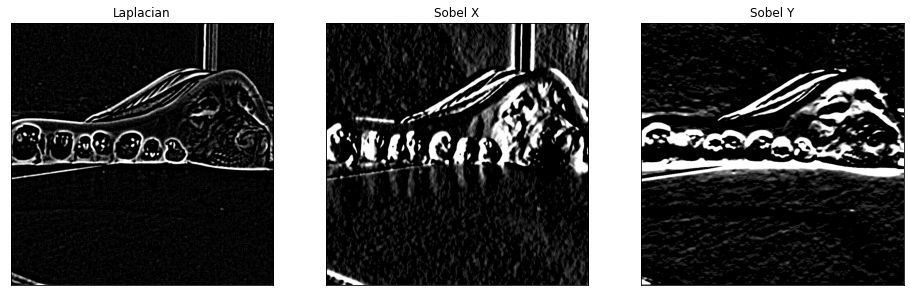

In [8]:
imgGray = cv2.cvtColor(blur15, cv2.COLOR_RGB2GRAY)

laplacian = cv2.Laplacian(imgGray,cv2.CV_8U,ksize=5)
sobelx = cv2.Sobel(imgGray,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(imgGray,cv2.CV_8U,0,1,ksize=5)

plt.subplot(131),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

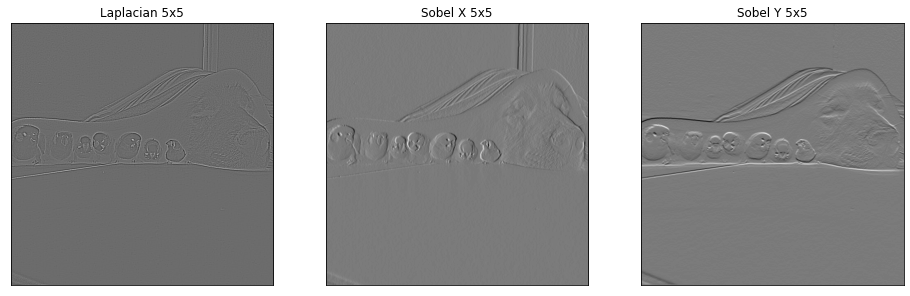

In [9]:
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplacian = cv2.Laplacian(imgGray,cv2.CV_64F,ksize=5)
sobelx = cv2.Sobel(imgGray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(imgGray,cv2.CV_64F,0,1,ksize=5)

plt.subplot(131),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian 5x5'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X 5x5'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y 5x5'), plt.xticks([]), plt.yticks([])

plt.show()

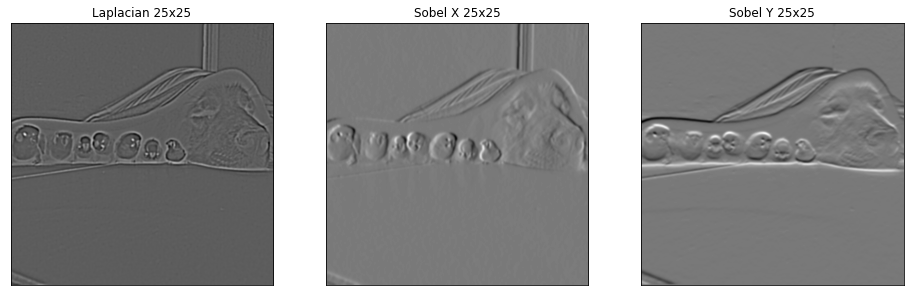

In [10]:
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplacian = cv2.Laplacian(imgGray,cv2.CV_64F,ksize=25)
sobelx = cv2.Sobel(imgGray,cv2.CV_64F,1,0,ksize=25)
sobely = cv2.Sobel(imgGray,cv2.CV_64F,0,1,ksize=25)

plt.subplot(131),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian 25x25'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X 25x25'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y 25x25'), plt.xticks([]), plt.yticks([])

plt.show()

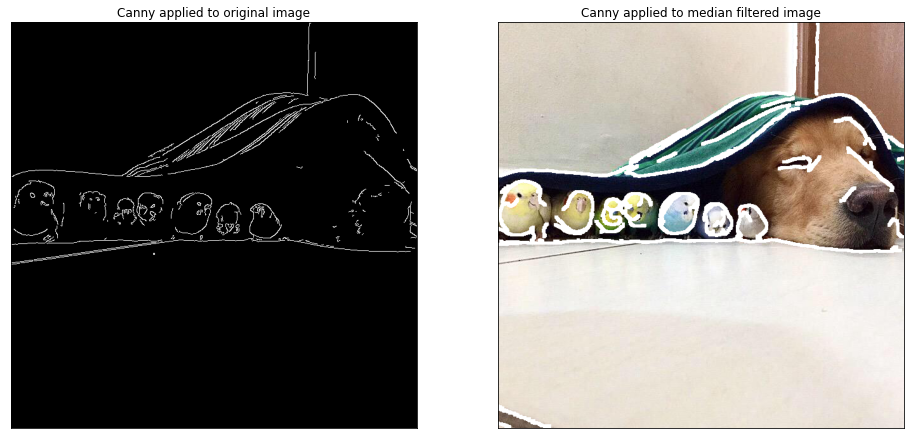

In [11]:
edges = cv2.Canny(imgGray,250,400)

median15 = cv2.cvtColor(median15, cv2.COLOR_RGB2GRAY)
edges2 = cv2.Canny(median15,80,150)
kernel = np.ones((5,5),np.uint8)
edges2 = cv2.dilate(edges2,kernel,iterations = 1)
edges2 = cv2.cvtColor(edges2, cv2.COLOR_GRAY2RGB)
imgEdges = img.copy()
imgEdges = cv2.add(imgEdges, edges2)

plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Canny applied to original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgEdges,cmap = 'gray')
plt.title('Canny applied to median filtered image'), plt.xticks([]), plt.yticks([])
plt.show()